# Proyek Analisis Data: Brazilian E-Commerce
- Nama: Alwizain Almas Trigreisian
- Email: alwizainalmastrigreisian@gmail.com
- Id Dicoding: alwizain_almas

## Menentukan Pertanyaan Bisnis

1. Bagaimana perbandingan penjualan setiap bulan pada tahun 2017 dengan 2018?
2. Pada bulan apa yang memiliki tingkat penjualan tertinggi?
3. Tipe transaksi apa yang sering digunakan?
4. Berapa rata-rata payment value pada bulan yang memiliki tingkat penjualan tertinggi?
5. Kategori barang apa yang paling sering dan sedikit dibeli?

## Menyiapkan semua library yang dibuthkan

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [125]:
customers_df = pd.read_csv("dataset\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [126]:
orders_df = pd.read_csv("dataset\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [127]:
products_df = pd.read_csv("dataset\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [128]:
sellers_df = pd.read_csv("dataset\sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [129]:
orderpayments_df = pd.read_csv("dataset\order_payments_dataset.csv")
orderpayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [130]:
orderitems_df = pd.read_csv("dataset\order_items_dataset.csv")
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [131]:
producttrans_df = pd.read_csv("dataset\product_category_name_translation.csv")
producttrans_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Menyatukan Data Kedalam Beberapa Dataframe

In [132]:
products = products_df.merge(producttrans_df, left_on='product_category_name', right_on='product_category_name',how='left')

In [133]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Memilih kolom yang dibutuhkan saja, yaitu product_id, product_category_name, dan product_category_name_english

In [134]:
df_product = products[["product_id","product_category_name","product_category_name_english"]]

In [135]:
df_product.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


Menggabungkan orderitems_df dengan df_product dengan menjadikannya df_orderitems

In [136]:
df_orderitems = orderitems_df.merge(df_product, left_on='product_id', right_on='product_id',how='left')

In [137]:
df_orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools


Menggabungkan df_orderitems dengan seller dengan menjadikannya df_orderitems

In [138]:
df_orderitems = df_orderitems.merge(sellers_df, left_on='seller_id', right_on='seller_id',how='left')

In [139]:
df_orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,87900,loanda,PR


Menggabungkan orders_df dengan orderpayments_df

In [140]:
orders = orders_df.merge(orderpayments_df, left_on='order_id', right_on='order_id',how='left')

In [141]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12


Menghapus kolom yang tidak diperlukan, yaitu payment_sequential dan payment_installments

In [142]:
orders = orders.drop(columns = ['payment_sequential','payment_installments'])
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,179.12


Manggabungkan orders dengan customers_df

In [143]:
df_orders = orders.merge(customers_df, left_on='customer_id', right_on='customer_id',how='left')

In [144]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


Menghapus kolom yang tidak diperlukan, yaitu customer_unique_id

In [145]:
df_orders = df_orders.drop(columns = ['customer_unique_id'])
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,18.12,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.00,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,18.59,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,141.46,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,179.12,75265,vianopolis,GO


#### Tabel df_orderitems

In [146]:
df_orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools,87900,loanda,PR


#### Tabel df_orders

In [147]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,18.12,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.00,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,18.59,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,141.46,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,179.12,75265,vianopolis,GO


### Assessing Data

Melakukan assesmen terhadap data sebelum dilakukannya analisis dan visualisasi. Dalam tahapan ini, data akan dilakukan pengecekan terhadap tipe data, missing value, duplikasi data, dan statistk deksriptif.

#### Menilai Tabel Order Items (df_orderitems)

In [148]:
df_orderitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_category_name_english  111023 non-null  object 
 9   seller_zip_code_prefix         112650 non-null  int64  
 10  seller_city                    112650 non-null  object 
 11  seller_state                   112650 non-null  object 
dtypes: float64(2), int64(2), objec

Pada kolom shipping_limit_date terdapat tipe data yang tidak sesuai yang sebaiknya memiliki tipe data date time.

In [149]:
df_orderitems.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_category_name_english    1627
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
dtype: int64

Pada kolom product_category_name dan product_category_name_english terdapat missing value sebanyak 1603 dan 1627.

In [150]:
print("Total duplikasi: ", df_orderitems.duplicated().sum())

Total duplikasi:  0


In [151]:
df_orderitems.describe()

,order_item_id,price,freight_value,seller_zip_code_prefix
count,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,24439.170431
std,0.705124,183.633928,15.806405,27596.030909
min,1.000000,0.850000,0.000000,1001.000000
25%,1.000000,39.900000,13.080000,6429.000000
50%,1.000000,74.990000,16.260000,13568.000000
75%,1.000000,134.900000,21.150000,27930.000000
max,21.000000,6735.000000,409.680000,99730.000000


#### Menilai Tabel Orders (df_orders)

In [152]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   payment_type                   103886 non-null  object 
 9   payment_value                  103886 non-null  float64
 10  customer_zip_code_prefix       103887 non-null  int64  
 11  customer_city                  103887 non-null  object 
 12  customer_state                

Pada kolom order_status terdapat tipe data yang tidak sesuai yang sebaiknya memiliki tipe data category. Kemudian pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date juga terdapat tipe data yang tidak sesuai yang sebaiknya memiliki tipe data date time.

In [153]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_type                        1
payment_value                       1
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

Pada kolom order_approved_at terdapat missing value sebanyak 175. Kemudian pada kolom order_delivered_carrier_date terdapat missing value sebanyak 1888. Pada kolom order_delivered_customer_date terdapat missing value sebanyak 3132. Pada kolom payment_type dan payment_value masing-masing memiliki missing value sebanyak 1.

In [154]:
print("Total duplikasi: ", df_orders.duplicated().sum())

Total duplikasi:  615


Pada tabel df_orders memiliki duplikasi data sebanyak 615 baris.

In [155]:
df_orders.describe()

,payment_value,customer_zip_code_prefix
count,103886.000000,103887.000000
mean,154.100380,35072.353490
std,217.494064,29743.416343
min,0.000000,1003.000000
25%,56.790000,11367.500000
50%,100.000000,24360.000000
75%,171.837500,58418.000000
max,13664.080000,99990.000000


### Cleaning Data

#### Melakukan Pembersihan Data Order Items (df_orderitems)

1. Mengubah tipe data pada kolom shipping_limit_date

In [156]:
df_orderitems['shipping_limit_date'] = pd.to_datetime(df_orderitems['shipping_limit_date'])

In [157]:
df_orderitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          111047 non-null  object        
 8   product_category_name_english  111023 non-null  object        
 9   seller_zip_code_prefix         112650 non-null  int64         
 10  seller_city                    112650 non-null  object        
 11  

2. Mengatasi missing value pada kolom product_category_name dan product_category_name_english dengan mengimputasinya menjadi nilai not defined.

In [158]:
df_orderitems['product_category_name'].fillna('not defined', inplace=True)
df_orderitems['product_category_name_english'].fillna('not defined', inplace=True)

In [159]:
df_orderitems.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

#### Melakukan Pembersihan Data Orders (df_orders)

1. Mengubah tipe data pada order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date

In [160]:
df_orders['order_status'] = df_orders['order_status'].astype('category')
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

In [161]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   customer_id                    103887 non-null  object        
 2   order_status                   103887 non-null  category      
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_approved_at              103712 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101999 non-null  datetime64[ns]
 6   order_delivered_customer_date  100755 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103887 non-null  datetime64[ns]
 8   payment_type                   103886 non-null  object        
 9   payment_value                  103886 non-null  float64       
 10  customer_zip_code_prefix       103887 non-null  int64         
 11  

2. Mengatasi missing value pada kolom payment_type dan payment value

Untuk missing value pada kolom lain tidak akan dihapus karena akan memengaruhi order status. Kolom tersebut berisi mengenai waktu pengiriman. Apabila belum terkirim akan menjadi missing value.

In [162]:
df_orders = df_orders.dropna(subset = ["payment_type","payment_value"])

In [163]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_type                        0
payment_value                       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

3. Membuat kolom year dan month untuk keperluan Exploratory Data Analysis (EDA) dan visualisasi data

In [164]:
df_orders['year'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y')
df_orders['month'] = df_orders['order_purchase_timestamp'].dt.strftime('%m-%Y')

## Exploratory Data Analysis (EDA)

1. Bagaimana perbandingan penjualan setiap bulan pada tahun 2017 dengan 2018?
2. Pada bulan apa yang memiliki tingkat penjualan tertinggi?
3. Tipe transaksi apa yang sering digunakan?
4. Berapa rata-rata payment value pada bulan yang memiliki tingkat penjualan tertinggi?
5. Kategori barang apa yang paling sering dan sedikit dibeli?

### Explore Table Order Items (df_orderitems)

In [165]:
df_orderitems.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650,112650,112650.000000,112650,112650
unique,98666,NaN,32951,3095,NaN,NaN,NaN,74,72,NaN,611,23
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,cama_mesa_banho,bed_bath_table,NaN,sao paulo,SP
freq,21,NaN,527,2033,NaN,NaN,NaN,11115,11115,NaN,27983,80342
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,NaN,NaN,24439.170431,NaN,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,NaN,1001.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,NaN,NaN,6429.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,NaN,NaN,13568.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,NaN,NaN,27930.000000,NaN,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,NaN,99730.000000,NaN,NaN


Berdasarkan pengecekan statistik deskriptif dapat diketahui bahwa kategori produk paling sering dibeli adalah bed_bath_table dan penjual yang paling banyak berada di kota Sao Paulo Brazil.

#### Melakukan eksplorasi jumlah order setiap tahunnya

In [166]:
df_orders.groupby('year').order_id.nunique()

year
2016      328
2017    45101
2018    54011
Name: order_id, dtype: int64

Berdasarkan eksplorasi, dapat diketahui bahwa ditahun 2016 memiliki jumlah order yang paling sedikit. Sedangkan pada tahun 2018 memiliki jumlah order yang paling banyak

#### Melakukan eksplorasi jumlah order setiap bulannya

In [167]:
df_orders.groupby('month').order_id.nunique()

month
01-2017     800
01-2018    7269
02-2017    1780
02-2018    6728
03-2017    2682
03-2018    7211
04-2017    2404
04-2018    6939
05-2017    3700
05-2018    6873
06-2017    3245
06-2018    6167
07-2017    4026
07-2018    6292
08-2017    4331
08-2018    6512
09-2016       3
09-2017    4285
09-2018      16
10-2016     324
10-2017    4631
10-2018       4
11-2017    7544
12-2016       1
12-2017    5673
Name: order_id, dtype: int64

Pada tahun 2016 hanya tersedia data pada 3 bulan terakhir, yaitu September, Oktober, dan Desember. Kemudian pada 2018 juga memiliki data yang kurang lengkap, yaitu tidak ada data pada bulan November dan Desember. Sedangkan pada tahun 2017 memiliki data terlengkap terkait penjualannya.

#### Melakukan eksplorasi rata-rata payment value pada setiap bulan

In [168]:
df_orders.groupby('month')['payment_value'].mean()

month
01-2017    162.927106
01-2018    147.428822
02-2017    154.776251
02-2018    142.759399
03-2017    158.570180
03-2018    154.373285
04-2017    162.500206
04-2018    161.018932
05-2017    150.334386
05-2018    161.735410
06-2017    148.799878
06-2018    159.507789
07-2017    137.220968
07-2018    163.906677
08-2017    148.218971
08-2018    152.646360
09-2016     84.080000
09-2017    161.152004
09-2018    277.471250
10-2016    172.779181
10-2017    160.427547
10-2018    147.417500
11-2017    151.962711
12-2016     19.620000
12-2017    149.007885
Name: payment_value, dtype: float64

Rata-rata payment value tertinggi terjadi pada bulan September tahun 2018, yaitu sebesar 277.471250.

#### Melakukan eksplorasi tipe payment yang sering digunakan

In [169]:
df_orders.groupby("payment_type").order_id.nunique().sort_values(ascending=True)

payment_type
not_defined        3
debit_card      1528
voucher         3866
boleto         19784
credit_card    76505
Name: order_id, dtype: int64

Tipe payment yang paling sering digunakan oleh customer adalah credit card dan debit card menjadi tipe payment yang sedikit digunakan oleh customer.

#### Melakukan eksplorasi terkait product

In [170]:
df_category = df_orderitems.groupby(by="product_category_name_english")["product_id"].count().reset_index()

In [171]:
df_category = df_category.rename(columns={"product_category_name_english": "category_name", "product_id": "total_orders"})

In [172]:
df_category.sort_values(by='total_orders', ascending=False)

,category_name,total_orders
7,bed_bath_table,11115
43,health_beauty,9670
66,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
...,...,...
3,arts_and_craftmanship,24
11,cds_dvds_musicals,14
52,la_cuisine,14
29,fashion_childrens_clothes,8


Product yang paling sering dibeli oleh customer terdapat pada kategori bed_bath_table dengan total pembelian sebanyak 11115 dan produk yang sedikit dibeli oleh customer terdapat pada kategori security_and_services dengan total pembelian sebanyak 2.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan penjualan setiap bulan pada tahun 2017 dengan 2018?

In [173]:
# Mendefinisikan total penjualan berdasarkan setiap bulannya
df_orders['monthx'] = df_orders['order_purchase_timestamp'].dt.strftime('%m')
df_month_orders = df_orders.groupby(by=["monthx","year"]).order_id.nunique().reset_index()
df_month_orders["monthx"] = df_month_orders["monthx"].astype(str).astype(int)
df_month_orders = df_month_orders[df_month_orders["monthx"] < 9]

# Mendefinisikan nama bulan
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August'
}

df_month_orders['month_names'] = df_month_orders['monthx'].map(month_names)

Text(0.5, 29.140625000000007, 'Month')

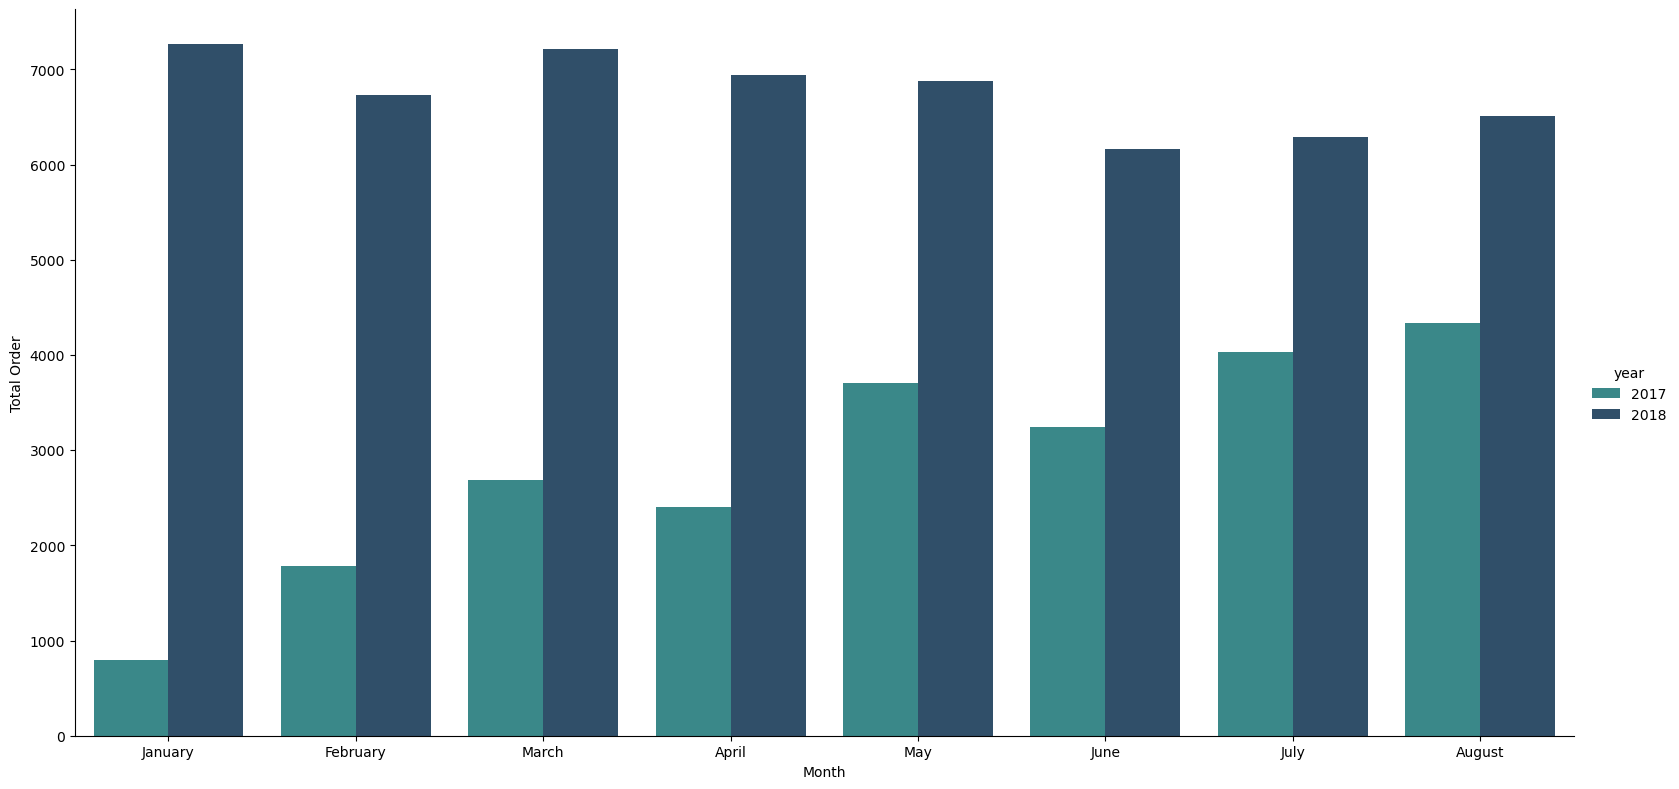

In [174]:
# Mendefinisikan warna visualisasi
custom_palette = ["#2D9596", "#265073"]

# Mendefinisikan visualisasi yang akan dibuat
sns.catplot(x='month_names', y='order_id', hue='year', data=df_month_orders, kind='bar', height=8, aspect=2, palette = custom_palette)

# Mendefinisikan judul pada label x dan y
plt.ylabel("Total Order")
plt.xlabel("Month")

In [175]:
# Melihat perbandingan total order pada tahun 2017 dengan 2018
df_orders_comparison = df_month_orders.groupby("year").order_id.sum().reset_index()
df_orders_comparison

,year,order_id
0,2017,22968
1,2018,53991


In [176]:
# Mendefinisikan pengambilan nilai untuk penghitungan kenaikan
x = df_orders_comparison['order_id'][0]
y = df_orders_comparison['order_id'][1]

# Rumus untuk menghitung persentasi kenaikan
increase = (y-x)/x*100
increase

135.0705329153605

Hasil kenaikan pada 2017 dengan 2018 yaitu sebanyak 135%.

### Pertanyaan 2: Pada bulan apa yang memiliki tingkat penjualan tertinggi?

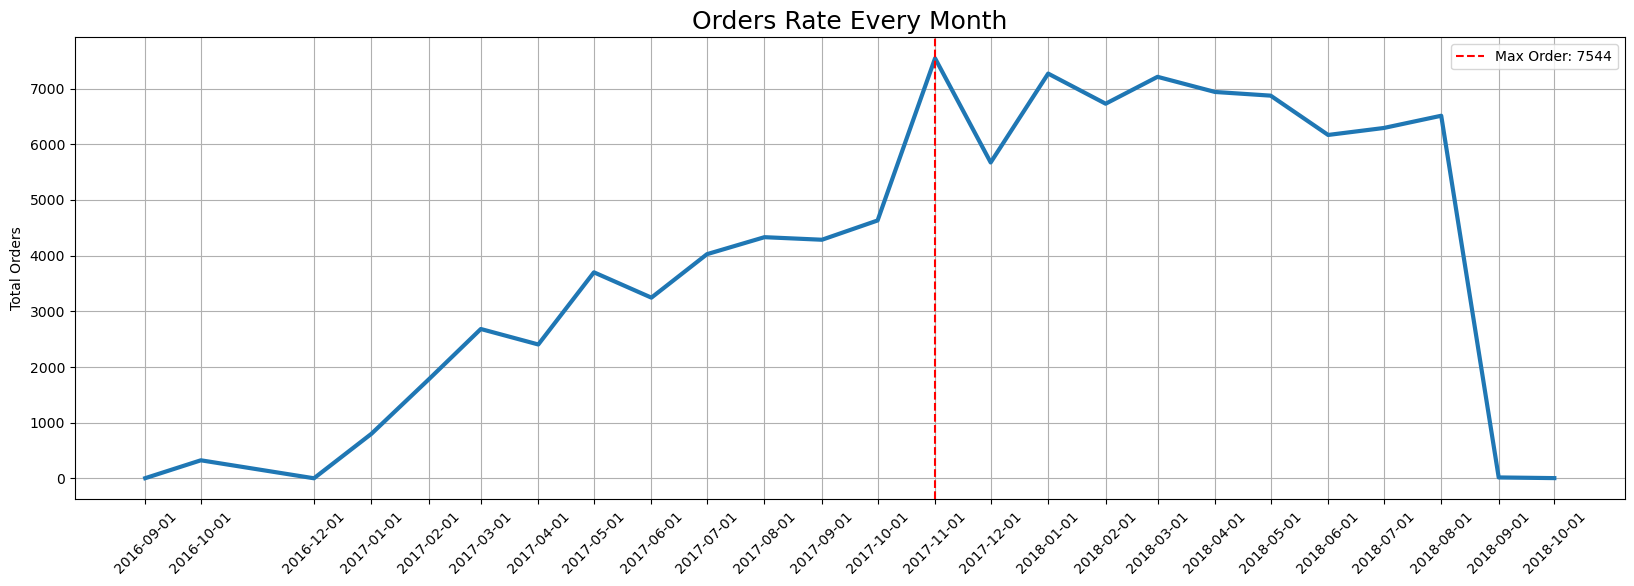

In [177]:
# Mengelompokkan bulan dan tahun berdasarkan total order
df_month =  df_orders.groupby(by=["month","year"]).order_id.nunique().reset_index()
df_month["month"] = pd.to_datetime(df_month["month"], format='%m-%Y')

# Mengatur ukuran visualisasi
plt.figure(figsize=(20, 6))

# Mendefinisikan visualisasi yang akan dibuat
ax = sns.lineplot(x='month', y='order_id', data=df_month, estimator=None, linewidth=3)
ax.set(xticks=df_month.month.values)

# Mendefinisikan judul visualisasi
plt.title("Orders Rate Every Month", loc="center", fontsize=18)

# Mendefinisikan judul pada label x dan y
plt.ylabel("Total Orders")
plt.xlabel(None)

# Mengatur grid (garis bantu)
ax.grid(True)

# Mengatur label x agar tidak menyatu
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Menambahkan tanda nilai tertinggi
max_order = df_month['order_id'].max()
max_month = df_month.loc[df_month['order_id'].idxmax(), 'month']
plt.axvline(x=max_month, color='r', linestyle='--', label=f'Max Order: {max_order}')
plt.legend()
plt.show()

Bulan yang memiliki penjualan tertinggi adalah pada bulan November 2017 dengan total orders sebanyak 7544.

### Pertanyaan 3: Tipe transaksi apa yang sering digunakan?

Text(0.5, 1.0, 'Payment Type Distribution')

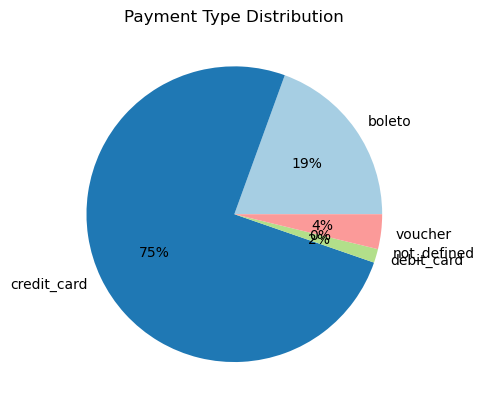

In [178]:
# Mengelompokkan payment type berdasarkan jumlah order
df_payment_type = df_orders.groupby(by="payment_type")["order_id"].nunique().reset_index()

# Mendefinisikan warna visualisasi
color = sns.color_palette('Paired') 

# Mendefinisikan visualisasi yang akan dibuat
plt.pie(df_payment_type["order_id"], labels=df_payment["payment_type"], colors=color, autopct='%.0f%%')

# Mendefinisikan judul visualisasi
plt.title("Payment Type Distribution")

Credit card menjadi tipe payment terbanyak, yaitu sebesar 75%

### Pertanyaan 4: Berapa rata-rata payment value pada bulan yang memiliki tingkat penjualan tertinggi?

In [179]:
# Dalam hal ini kita sudah mengetahui bahwa bulan yang memiliki penjualan tertinggi yaitu pada bulan November.
# Maka kita langsung mengambil payment value pada bulan November (11).

df_payment_value = df_orders[df_orders.order_purchase_timestamp.dt.month == 11].groupby(by="payment_type")["payment_value"].mean().reset_index()
df_payment_value

,payment_type,payment_value
0,boleto,149.961789
1,credit_card,159.887514
2,debit_card,88.115714
3,voucher,50.557339


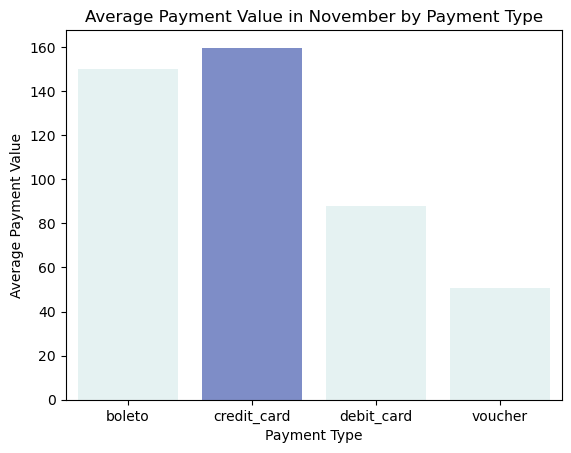

In [180]:
# Mendefinisikan varna bar
colors = ["#E3F4F4", "#7286D3", "#E3F4F4", "#E3F4F4"]

# Mendefinisikan sumbu x dan y
sns.barplot(x='payment_type', y='payment_value', data=df_payment_value, palette=colors)

# Mendefinisikan judul visualisasi
plt.title('Average Payment Value in November by Payment Type')

# Mendefinisikan label pada sumbu X
plt.xlabel('Payment Type')

# Mendefinisikan label pada sumbu Y
plt.ylabel('Average Payment Value')

# Menampilkan plot visualisasi
plt.show()

### Pertanyaan 5: Kategori barang apa yang paling sering dan sedikit dibeli?

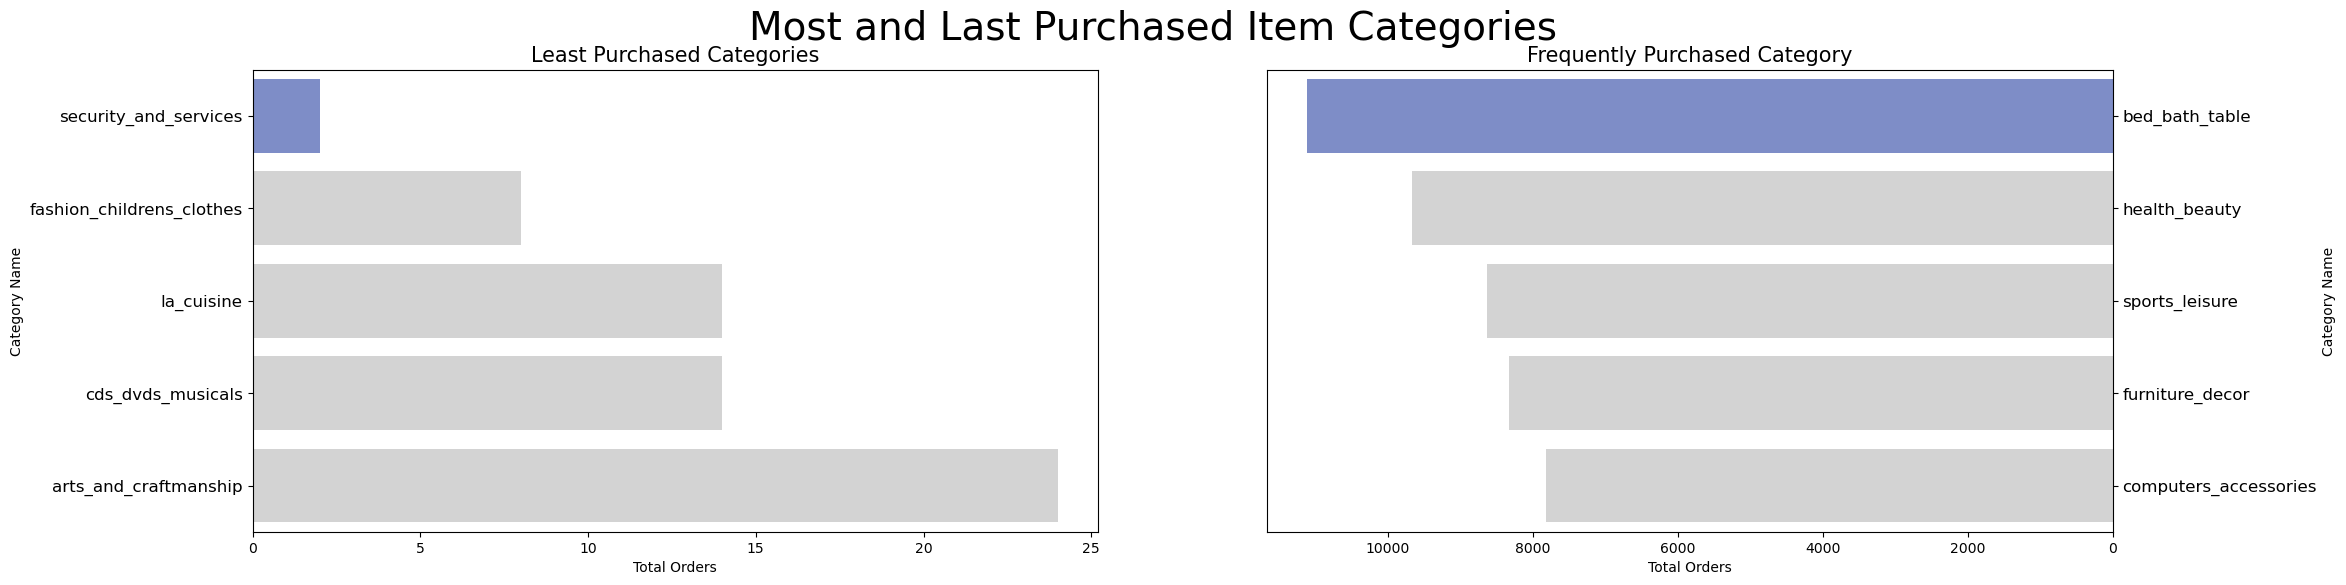

In [181]:
# Mendefinisikan tata letak
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Mendefinisikan warna bar
colors = ["#7286D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Mendefinisikan penjualan yang paling sedikit dibeli
sns.barplot(x="total_orders", y="category_name", data=df_category.sort_values(by="total_orders", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel('Category Name')
ax[0].set_xlabel('Total Orders')
ax[0].set_title("Least Purchased Categories", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# Mendefinisikan penjualan yang paling sering dibeli
sns.barplot(x="total_orders", y="category_name", data=df_category.sort_values(by="total_orders", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel('Category Name')
ax[1].set_xlabel('Total Orders')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Frequently Purchased Category", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Mendefinisikan judul visualisasi
plt.suptitle("Most and Last Purchased Item Categories", fontsize=28)

# Menampilkan plot visualisasi
plt.show()

Kategori yang paling sering dibeli adalah bed_bath_table, sedangkan untuk kategori yang sedikit dibeli adalah security_and_services.

## Conclusion

- Bagaimana perbandingan penjualan setiap bulan pada tahun 2017 dengan 2018?

    Perbandingan penjualan setiap bulan antara 2017 dengan 2018 memiliki kenaikan yang signifikan yaitu sebesar 135%.

- Pada bulan apa yang memiliki tingkat penjualan tertinggi?

    Pada bulan November 2017 merupakan tingkat penjualan tertinggi yang diperoleh perusahaan dengan total sebanyak 7544 penjualan.

- Tipe transaksi apa yang sering digunakan?

    Tipe transaksi yang sering digunakan adalah credit card dengan penggunaan sebesar 75% dari total tipe transaksi yang digunakan.

- Berapa rata-rata payment value pada bulan yang memiliki tingkat penjualan tertinggi?

    Rata-rata payment value pada bulan yang memiliki tingkat penjualan tertinggi yaitu terdapat pada tipe transaksi credit card dengan rata-rata sebesar 159.887514.

- Kategori barang apa yang paling sering dan sedikit dibeli?

    Kategori yang paling sering dibeli adalah bed_bath_table, sedangkan untuk kategori yang sedikit dibeli adalah security_and_services.

In [182]:
# Export file dataset terbaru (df_orders)
file_path = 'orders.csv'
df_orders.to_csv(file_path, index=False)

# Export file dataset terbaru (df_orderitems)
file_path = 'orderitems.csv'
df_orderitems.to_csv(file_path, index=False)